# Start date 05AUG2025

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"D:\Guvi project 3\swiggy.csv")
df.drop(['id','lic_no','link','address','menu'],axis=1,inplace=True)

df['rating'].replace({'--': np.nan}, inplace=True)
df.dropna(inplace=True)
df['rating']=df.rating.astype(float)

# Load dataset
df = pd.read_csv(r"D:\Guvi project 3\cleaned_data.csv")

# ✅ Split cuisines into multiple rows
df['cuisine'] = df['cuisine'].astype(str)  # Ensure string type
df = df.assign(cuisine=df['cuisine'].str.split(','))  # Split into lists
df = df.explode('cuisine')  # Expand each list item into a new row
df['cuisine'] = df['cuisine'].str.strip()  # Clean spaces

# (Optional) Reset index
df.reset_index(drop=True, inplace=True)


# Assuming df is already loaded and pre-processed
df1 = df.copy()


df1['rating_count'].replace({
    '10K+ ratings': 1,
    '5K+ ratings': 2,
    '1K+ ratings': 3,
    '500+ ratings': 4,
    '100+ ratings': 5,
    '50+ ratings': 6,
    '20+ ratings': 7,
    'Too Few Ratings': 8
}, inplace=True)

def assign_rand (val):
    if val == 1:
        return np.random.randint(10000, 12000)
    elif val == 2:
        return np.random.randint(5000, 10001)
    elif val == 3:
        return np.random.randint(1000, 5001)
    elif val == 4:
        return np.random.randint(500, 1001)
    elif val == 5:
        return np.random.randint(100, 501)
    elif val == 6:
        return np.random.randint(50, 101)
    elif val == 7:
        return np.random.randint(20, 51)
    else:
        return np.random.randint(0, 19)

df1['rating_count'] = df1['rating_count'].apply(assign_rand)

df1.sort_values(by=['rating_count'],inplace=True)

#Remove Rupee symbol
df1['Cost']=df1['cost'].str.replace(r'[^\d.]', '', regex=True)
df1['cost']=df1.Cost.copy()
df1.drop(['Cost'],axis=1,inplace=True)

def split_city(val):
    parts = str(val).split(',')
    if len(parts) == 1:
        return [np.nan, parts[0]]                 # only location
    elif len(parts) == 2:
        return [parts[0], parts[1]]               # area, location
    else:
        return [parts[0], parts[-1]]              # first as area, last as location

df1[['area', 'location']] = df1['city'].apply(split_city).apply(pd.Series)


def split_cuisine(val):
    parts = str(val).split(',')
    if len(parts) == 1:
        return [np.nan, parts[0]]                 
    elif len(parts) == 2:
        return [parts[0], parts[1]]               
    else:
        return [parts[0], parts[-1]]              


df2=df1.copy()
df2.drop(['city','area'],axis=1,inplace=True)
df2.rename(columns={'location':'city'},inplace=True)
# Cleaned data is exported

df2.to_csv(r"D:\Guvi project 3\cleaned_data.csv",index=False)

C:\Users\Test\AppData\Local\Temp\ipykernel_32180\2961582253.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace({'--': np.nan}, inplace=True)
C:\Users\Test\AppData\Local\Temp\ipykernel_32180\2961582253.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

AttributeError: Can only use .str accessor with string values!

In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"D:\Guvi project 3\swiggy.csv")

# Drop unwanted columns
df.drop(['id', 'lic_no', 'link', 'address', 'menu'], axis=1, inplace=True)

# Replace and clean rating values  ✅ FIXED (no inplace)
df['rating'] = df['rating'].replace({'--': np.nan})
df.dropna(subset=['rating'], inplace=True)
df['rating'] = df['rating'].astype(float)

# Save cleaned intermediate file (optional)
# df.to_csv(r"D:\Guvi project 3\swiggy_clean.csv", index=False)

# Read cleaned data again (if needed)
df = pd.read_csv(r"D:\Guvi project 3\cleaned_data.csv")

# ✅ Split cuisines into multiple rows
df['cuisine'] = df['cuisine'].astype(str)
df = df.assign(cuisine=df['cuisine'].str.split(','))
df = df.explode('cuisine')
df['cuisine'] = df['cuisine'].str.strip()
df.reset_index(drop=True, inplace=True)

# Copy for transformations
df1 = df.copy()

# Replace rating_count categories with numbers  ✅ FIXED
df1['rating_count'] = df1['rating_count'].replace({
    '10K+ ratings': 1,
    '5K+ ratings': 2,
    '1K+ ratings': 3,
    '500+ ratings': 4,
    '100+ ratings': 5,
    '50+ ratings': 6,
    '20+ ratings': 7,
    'Too Few Ratings': 8
})

# Assign random rating count based on ranges
def assign_rand(val):
    if val == 1:
        return np.random.randint(10000, 12000)
    elif val == 2:
        return np.random.randint(5000, 10001)
    elif val == 3:
        return np.random.randint(1000, 5001)
    elif val == 4:
        return np.random.randint(500, 1001)
    elif val == 5:
        return np.random.randint(100, 501)
    elif val == 6:
        return np.random.randint(50, 101)
    elif val == 7:
        return np.random.randint(20, 51)
    else:
        return np.random.randint(0, 19)

df1['rating_count'] = df1['rating_count'].apply(assign_rand)
df1.sort_values(by='rating_count', inplace=True)

# Remove rupee symbol from cost column  ✅ FIXED
df1['cost'] = df1['cost'].replace(r'[^\d.]', '', regex=True)

# Split city into area and location
def split_city(val):
    parts = str(val).split(',')
    if len(parts) == 1:
        return [np.nan, parts[0]]  # only location
    elif len(parts) == 2:
        return [parts[0], parts[1]]  # area, location
    else:
        return [parts[0], parts[-1]]  # first as area, last as location

df1[['area', 'location']] = pd.DataFrame(df1['city'].apply(split_city).tolist(), index=df1.index)

# Prepare final DataFrame
df2 = df1.copy()
df2.drop(['city', 'area'], axis=1, inplace=True)
df2.rename(columns={'location': 'city'}, inplace=True)

# Export cleaned file
df2.to_csv(r"D:\Guvi project 3\cleaned_data.csv", index=False)

print("✅ Cleaned data exported successfully — no warnings expected.")


✅ Cleaned data exported successfully — no warnings expected.


In [5]:
df2.head()

,name,rating,rating_count,cost,cuisine,city
96790,Sharma Snacks,4.4,0,100,Snacks,Kolkata
75323,Thali Delight,3.6,0,250,Thalis,Delhi
66545,Healthy Chulha,3.8,0,200,North Indian,Delhi
66548,Zomoz - The Momo Company,4.3,0,250,Indian,Hyderabad
108453,The Clove New Delhi,4.4,0,300,Snacks,Delhi


# Final new code

C:\Users\Test\AppData\Local\Temp\ipykernel_12580\3809416079.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41774882 -0.41774882 -0.41774882 ... 15.34279353 15.66786487
 15.75048717]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_df.loc[:, ['rating', 'rating_count', 'cost']] = scaler.fit_transform(
C:\Users\Test\AppData\Local\Temp\ipykernel_12580\3809416079.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01380065 1.18516996 0.59362846 ... 0.30664298 0.01380065 0.01380065]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_df.loc[:, ['rating', 'rating_count', 'cost']] = scaler.fit_transform(


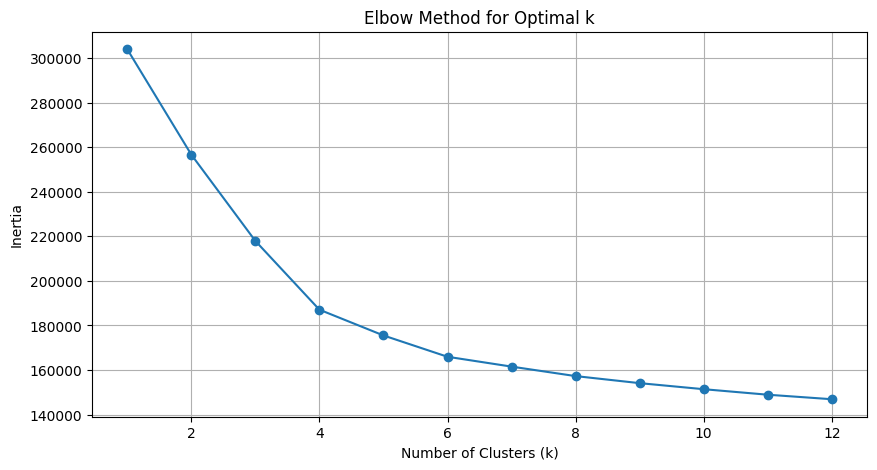

                                     name               cuisine  \
0                         THE ROYAL RASOI  North Indian,Chinese   
1                           Haju's Darbar               Chinese   
2                   IMPERIAL CHINESE FOOD               Chinese   
3                              Rolls king       Chinese,Tandoor   
4  Cafe 1st Story - Fairfield By Marriott    Indian,Continental   

               city  cluster  
0          Yavatmal        2  
1           Kolkata        3  
2              Pune        0  
3  Aurangabad_bihar        0  
4           Chennai        3  

Cluster Centers (scaled):
     rating  rating_count      cost  cuisine_Afghani  \
0 -1.188806     -0.266606 -0.283768     5.588778e-05   
1  0.338218      4.582237  0.051465    -1.423015e-19   
2  0.498296     -0.121380 -0.245008    -3.252607e-18   
3  0.486345     -0.135572  2.213555     1.627869e-04   

   cuisine_Afghani,American  cuisine_Afghani,Arabian  \
0              5.588778e-05             2.23551

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"D:\Guvi project 3\cleaned_data.csv")

# OneHotEncode categorical columns
encoder = OneHotEncoder(sparse_output=False)
cat_features = encoder.fit_transform(df[['cuisine', 'city']])
cat_df = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(['cuisine', 'city']))

# Combine numerical + categorical
num_df = df[['rating', 'rating_count', 'cost']].reset_index(drop=True)
final_df = pd.concat([num_df, cat_df], axis=1)

# Standardize numerical features (important for clustering)
scaler = StandardScaler()

### ✅ CHANGED HERE: safer way to assign scaled values
final_df.loc[:, ['rating', 'rating_count', 'cost']] = scaler.fit_transform(
    final_df[['rating', 'rating_count', 'cost']]
)

# Elbow method function
def opt_kmeans(data, max_k=10):
    means = []
    inertias = []

    for k in range(1, max_k + 1):
        k_m = KMeans(n_clusters=k, random_state=42, n_init=10)
        k_m.fit(data)
        means.append(k)
        inertias.append(k_m.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    plt.show()

# Run elbow method
opt_kmeans(final_df, max_k=12)

# Fit KMeans with optimal k
### ✅ CHANGED HERE: added .copy() to avoid any data sync or warning issues
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(final_df.copy())

# View resulting clusters
print(df[['name', 'cuisine', 'city', 'cluster']].head())

### ✅ OPTIONAL ADDITION: view cluster centers for interpretation
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=final_df.columns)
print("\nCluster Centers (scaled):")
print(cluster_centers.head())


In [ ]:

# --- Step 3: Recommendation function ---
def recommend(restaurant_name, top_n=3):
    if restaurant_name not in df['name'].values:
        return "Restaurant not found."
    cluster_id = df.loc[df['name']==restaurant_name, 'cluster'].values[0]
    recs = df[(df['cluster']==cluster_id) & (df['name']!=restaurant_name)]
    return recs[['name','rating','cost','cuisine','city']].head(top_n)


In [ ]:

encoder = OneHotEncoder()
cat_features = encoder.fit_transform(df[['cuisine','city']]).toarray()
cat_df = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(['cuisine','city']))

# Combine numerical + categorical
num_df = df[['rating','rating_count','cost']].reset_index(drop=True)
final_df = pd.concat([num_df, cat_df], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

# --- Step 2: Clustering ---
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 3: Recommendation function ---
def recommend(restaurant_name, top_n=3):
    if restaurant_name not in df['name'].values:
        return "Restaurant not found."
    cluster_id = df.loc[df['name']==restaurant_name, 'cluster'].values[0]
    recs = df[(df['cluster']==cluster_id) & (df['name']!=restaurant_name)]
    return recs[['name','rating','cost','cuisine','city']].head(top_n)
a
# Example: Get recommendations for Mainland China
print(recommend("Mainland China"))


,name,city,rating,rating_count,cost,cuisine,tot_len
18214,BURGER HANGOUT,"Sanjay Nagar, New BEL Road,Bangalore",3.7,20,₹ 500,Pizzas,3
18145,Kitchens of China,"Sanjay Nagar, New BEL Road,Bangalore",3.5,20,₹ 450,"Chinese,Thai",3
18087,"Frozen Bottle - Milkshakes, Desserts And Ice C...","Sanjay Nagar, New BEL Road,Bangalore",3.5,20,₹ 250,"Beverages,Desserts",3
17936,Shri Krishna Bhavan Sweets,"Sanjay Nagar, New BEL Road,Bangalore",4.0,20,₹ 100,Chaat,3
18361,Food Court By Kitchens@,"Sanjay Nagar, New BEL Road,Bangalore",3.9,21,₹ 450,"Biryani,Mughlai",3
...,...,...,...,...,...,...,...
78597,Kinara Grand,"Tarnaka, Nacharam & Malkajigiri,Hyderabad",4.0,4302,₹ 500,"North Indian,Chinese",3
78673,KARACHI BAKERY,"Tarnaka, Nacharam & Malkajigiri,Hyderabad",4.2,4381,₹ 200,"Bakery,Pizzas",3
18257,IDC KITCHEN,"Sanjay Nagar, New BEL Road,Bangalore",4.3,4622,₹ 150,"South Indian,North Indian",3
78480,Paradise Biryani,"Tarnaka, Nacharam & Malkajigiri,Hyderabad",3.5,4928,₹ 500,"Biryani,Kebabs",3


In [7]:
df.id.nunique()

148255

In [20]:
df.shape[0]

148255

In [23]:
df1=df.id.drop_duplicates()

In [24]:
df1.shape[0]

148255

In [32]:
df.name.nunique()

112683

In [31]:
df[df.duplicated(subset=['name'])].sort_values(by=['name'])

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
72626,62739,#Waffles,"Begumpet,Hyderabad",3.9,50+ ratings,₹ 400,Desserts,13619014000909,https://www.swiggy.com/restaurants/-waffles-si...,"#Waffles, Sindhi Colony, Opposite Lakshmi Vila...",Menu/62739.json
58283,426907,(ICF) INDIAN CHAAT FACTORY,"Indirapuram,Delhi",3.5,20+ ratings,₹ 300,"Chaat,North Indian",22721691000538,https://www.swiggy.com/restaurants/-icf-indian...,"(ICF) INDIAN CHAAT FACTORY, SHOP NO. 10C, OC S...",Menu/426907.json
133242,212454,1 Bake Shop,Puri,--,Too Few Ratings,₹ 150,"Beverages,Bakery",22021038000072,https://www.swiggy.com/restaurants/1-bake-shop...,"1 Bake Shop, HOSPITAL SQUARE, NEAR MANDAKINI H...",Menu/212454.json
146661,69084,10 Downing Street,"Governorpet,Vijayawada",3.0,20+ ratings,₹ 800,"Continental,Chinese",10121006001161,https://www.swiggy.com/restaurants/10-downing-...,"10 Downing Street, 4th Floor, PVP Mall, MG Roa...",Menu/69084.json
44980,521080,10 Downing Street,"Hopes,Coimbatore",--,Too Few Ratings,₹ 700,"North Indian,Chinese",12416003000120,https://www.swiggy.com/restaurants/10-downing-...,"10 Downing Street, No 4, Ground Floor, The Arc...",Menu/521080.json
...,...,...,...,...,...,...,...,...,...,...,...
109381,336374,wow chinese,"Scruz Bandra East,Mumbai",3.3,20+ ratings,₹ 300,Chinese,license,https://www.swiggy.com/restaurants/wow-chinese...,"wow chinese, Shop No 8, Maskat Agaa, Masjid Ga...",Menu/336374.json
39075,450584,zwarma,"Velachery,Chennai",--,Too Few Ratings,₹ 200,"Arabian,Grill",12421008003744,https://www.swiggy.com/restaurants/zwarma-vela...,"zwarma, X6Q3+C8J, Adambakkam, Chennai, Tamil N...",Menu/450584.json
41933,500426,zwarma,"Mogappair,Chennai",--,Too Few Ratings,₹ 200,North Indian,12422023000406,https://www.swiggy.com/restaurants/zwarma-moga...,"zwarma, 1030, Ohari Salai Rd, Everest Colony, ...",Menu/500426.json
118404,472534,zwarma,Ooty,3.0,20+ ratings,₹ 200,"Arabian,Snacks",22421466000283,https://www.swiggy.com/restaurants/zwarma-cher...,"zwarma, Top Grills, No.1106/4d., Near Aavin,Co...",Menu/472534.json


In [45]:
df.name.unique()

array(['AB FOODS POINT', 'Janta Sweet House', 'theka coffee desi', ...,
       'Cafe Bella Ciao', 'GRILL ZILLA', 'Lazeez kitchen'],
      shape=(112683,), dtype=object)

In [65]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [66]:
name=df.groupby(['name','city','cuisine']).agg(total=('city','count'))

In [73]:
name.head()

,,,total
name,city,cuisine,
!PUNJ,"Mayur Vihar,Delhi","North Indian,Chinese",1
""" KAMAT (Original)- Siripuram""","Dwarka Nagar,Vizag","Biryani,Chinese",1
"""C/o. Bhojbari""",Siliguri,"Bengali,Thalis",1
"""JUICE BAR "" Plan B",Erode,Juices,1
"""KLV"" Kadal Meen Virpanai Nilayam",Dindigul,"South Indian,Seafood",1


In [56]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [61]:
lic=df.groupby(['lic_no']).agg(total=('city','count'))

In [72]:
name.isnull().sum()

total    0
dtype: int64

In [70]:
df.name.str.strip()

0                   AB FOODS POINT
1                Janta Sweet House
2                theka coffee desi
3                        Singh Hut
4                    GRILL MASTERS
                    ...           
148536            The Food Delight
148537    MAITRI FOODS & BEVERAGES
148538             Cafe Bella Ciao
148539                 GRILL ZILLA
148540              Lazeez kitchen
Name: name, Length: 148255, dtype: object

In [ ]:
# Import kmeans packages
#missing values inputing
# One hot encoding
# encoding






In [8]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization

In [ ]:
``